# Capstone 1

The goal of this project is to see whether fighters in the Red Corner in UFC fights win at a higher rate than fighers in the Blue Corner.

### Introduction

The **Ultimate Fighting Championship** (UFC from hereon) has existed since 1993 and has established itself as a top fight promoter. In 2018, there were a total of 473 fights, of which 18 were title bouts. The promotion brought in over $600 million in 2018, and lucrative deals with ESPN suggest that the promotion will continue to expand and increase profitability.

In each UFC fight, one fighter is in the Red Corner, and one fighter is in the Blue Corner. For title bouts, determining which fighter goes in which corner is simple: the Red Corner is for the current champion, and the Blue Corner is for the challenger. For non-title bouts, however, the favored fighter is put in the Red Corner. Thus, an important question is whether or not fighters out of the Red Corner win more than their Blue Corner counterparts. Thankfully, there exists a dataset that will answer that question.

### The Dataset

In [28]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
ufc_data = pd.read_csv('C:\\ufc_data.csv')
ufc_data.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


This [dataset](https://www.kaggle.com/rajeevw/ufcdata), found at Kaggle, contains the results of every UFC fight from the promotion's inception in 1993 to June of this year. As can be seen above, each row lists the fighter in each corner, the result, whether or not the fight was a title bout, in addition to a large amount of other data.

### Hypothesis
Due to the UFC's own criteria for Red Corner, it is likely that fighters in the Red Corner should win more than fighters in the Blue Corner. The hypothesis to be tested in this analysis is that fighters in the Red Corner win more than fighters in the Blue Corner. Naturally, the null hypothesis is that fighters in the Red Corner and fighters in the Blue Corner win at the same rate.

For the purposes of statistical analysis, the *Winner* column listing "Red", "Blue", and "Draw" is not particularly helpful, so those entries must be converted to numerical values.

In [7]:
#red = 1, blue = -1, draw = 0
ufc_data['Winner'].replace('Draw',0,inplace=True)
ufc_data['Winner'].replace('Red',1,inplace=True)
ufc_data['Winner'].replace('Blue',-1,inplace=True)
ufc_data['Winner'].head()

0    1
1    1
2    1
3   -1
4   -1
Name: Winner, dtype: int64

Red has been replaced with 1; Blue has been replaced with -1; and Draw has been replaced with 0. Now, it is possible to do statistical analysis based on the *Winner* column.

In [11]:
#break results into two frames: title fights, non-title fights
only_titles = ufc_data[ufc_data['title_bout']==True]
no_titles = ufc_data[ufc_data['title_bout']==False]
print(only_titles['Winner'].mean())
print(no_titles['Winner'].mean())

0.6179104477611941
0.347681430650863


Across both title and non-title bouts, Red Fighters win more. This is evident from the fact that the mean of the *Winner* column for each frame is above 0. If fighters in each corner win at the same rates, the mean should be 0.

In [12]:
#comapring the rates for title bouts and non-title bouts
print(stats.ttest_ind(only_titles['Winner'],no_titles['Winner']))

Ttest_indResult(statistic=5.19833667479254, pvalue=2.0885992505618584e-07)


Interestingly, while fighters in the Red Corner perform better in both title and non-title bouts, the difference in win rates between title and non-title bouts is significant. This statistical significance is logical, because in title bouts, the fighter in the Red Corner is the defending champion. It is reasonable to expect that the defending champion would be able to win again.

### Modifying the Dataset
Unfortunately, the basic Kaggle dataset has no aggregated data for each fighter. Since each row is a single fight, an individual fighter may be in the Red Corner in one row, but in the Blue Corner in a separate row. This fact makes it impossible to compare individual fighters and to truly find out if the Red Corner outperforms the Blue Corner. To remedy this problem, individual fighter data can be aggregated by iterating through the initial dataset and creating an entirely new dataset.

In [13]:
#Code here is commented out because it takes time to run

#unique_r = []
#for element in ufc_data['R_fighter'].unique():
#    unique_r.append(element)
#unique_b = []
#for element in ufc_data['B_fighter'].unique():
#    unique_b.append(element)

#all_fighters = unique_r
#for element in unique_b:
#    if element not in all_fighters:
#        all_fighters.append(element)

#list_dict = [{} for _ in range(len(all_fighters))]
        
#for i in range(len(all_fighters)):
#    list_dict[i]['name'] = all_fighters[i]
#    r_fights = len(ufc_data.loc[ufc_data['R_fighter']==all_fighters[i]])
#    b_fights = len(ufc_data.loc[ufc_data['B_fighter']==all_fighters[i]])
#    r_wins = len(ufc_data[(ufc_data['R_fighter']==all_fighters[i]) & (ufc_data['Winner']==1)])
#    b_wins = len(ufc_data[(ufc_data['B_fighter']==all_fighters[i]) & (ufc_data['Winner']==-1)])    
#    list_dict[i]['r_fights'] = r_fights
#    list_dict[i]['r_wins'] = r_wins
#    list_dict[i]['b_fights'] = b_fights
#    list_dict[i]['b_wins'] = b_wins
#    list_dict[i]['total_fights'] = list_dict[i]['r_fights']+list_dict[i]['b_fights']
#    list_dict[i]['r_win_pct'] = list_dict[i]['r_wins']/list_dict[i][r_fights]
#    list_dict[i]['b_win_pct'] = list_dict[i]['b_wins']/list_dict[i][b_fights]
#    list_dict[i]['win_pct'] = (list_dict[i][r_wins] + list_dict[i][b_wins])/list_dict[i][total_fights]

The above code first creates a list of all unique fighters would fought in the red corner (unique_r) and the blue corner (unique_b). Following that, a unique list of all fighters (all_fighters) is constructed. Then, a list of dictionaries is created with length matching the length of all_fighters. From this point, a long `for` loop iterates through each entry in both all_fighters and ufc_data. For each fighter in all_fighters, Red Corner fights (r_fights), Red Corner wins (r_wins), Blue Corner fights (b_fights), and Blue Corner wins (b_wins) is calculated. Total fights is also computed from the sum of r_fights and blue_fights. Red win percentage (r_win_pct), blue win percentage (b_win_pct), and overall win percentage (win_pct) are additionally calculated. Following the construction of the list of dictionaries, dictionary entries are moved to an array structure.

In [15]:
win_loss = pd.read_csv('C:\\win_loss.csv')
win_loss.head()

,name,r_fights,r_wins,b_fights,b_wins,total_fights,win_pct,r_win_pct,b_win_pct
0,Henry Cejudo,6,6,5,3,11,0.818182,1.000000,0.600000
1,Valentina Shevchenko,4,4,4,2,8,0.750000,1.000000,0.500000
2,Tony Ferguson,12,11,4,4,16,0.937500,0.916667,1.000000
3,Jimmie Rivera,5,2,4,4,9,0.666667,0.400000,1.000000
4,Tai Tuivasa,2,1,3,2,5,0.600000,0.500000,0.666667


After the long `for` loop, a nice-looking dataset has been constructed. Each fighter has a unique row tabulating total fights in each corner, total wins in each corner, win rate in each corner, and overall win rate.

Now it will be possible to see if there is a significant difference between the Red Corner and the Blue Corner. Win rates in each individual corner will be able to be compared across all fighters.

0.4162476910574412
0.22664908203289746


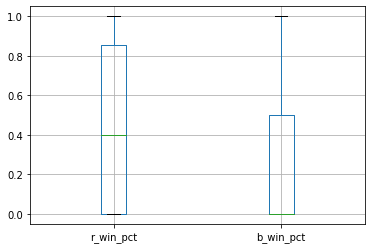

In [32]:
#show means of both columns and then compare via boxplot
print(win_loss['r_win_pct'].mean())
print(win_loss['b_win_pct'].mean())
win_loss.boxplot(column=['r_win_pct', 'b_win_pct']);

From the means and the boxplot, it looks as though fighters in the Red Corner win more. This comparison is more powerful because it is across all fighters and compares the win rates for each fighter in each corner. To see if the differences are actually significant, a t-test is the next step.

In [33]:
print(stats.ttest_ind(win_loss['r_win_pct'],win_loss['b_win_pct']))

Ttest_indResult(statistic=15.761918420283592, pvalue=2.7986868187387905e-54)


The t-test confirms that the difference is significant. There is now sufficient evidence to reject the null hypothesis and accept that fighters in the Red Corner win more than fighters in the Blue Corner.

### Conclusion
From the initial dataset, it was apparent the fighters in the Red Corner won more than fighters in the Blue Corner. This difference was especially apparent in the case of title bouts. After reworking the initial dataset into a new dataset for easier comparison, it became clear that the win rate differences were statistically significant, confirming the hypothesis posited at the outset of the project. This result means that the criteria for selecting the Red Corner fighter in non-title bouts are accurate. Red Corner is thus a predictor of the outcome of the fight.

### Going Forward
There is a large amount of data available in the base UFC dataset. For future investigation, using data not used in this capstone may provide good insight into the outcomes of UFC fights. A good place to start may be fighter ages as well as fighter win streaks.